# Creating a custom image dataset

## Importing data

Will be collecting data from google using python lib
Install python library using pip:
```bash
pip install google_images_download
```
Install Chrome and Chromedriver:
https://sites.google.com/a/chromium.org/chromedriver/downloads

Download data:
```bash
googleimagesdownload -k "vitaliy klichko" -s medium -wr '{"time_min":"01/01/2008","time_max":"01/01/2010"}' -l 500 -o /home/viktor/dev/ml/fastai-homework/lesson1/vitaliy-vs-vladimir -i train/vitaliy -cd /home/viktor/Programs/chromedriver

googleimagesdownload -k "vladimir klichko" -s medium -wr '{"time_min":"01/01/2008","time_max":"01/01/2010"}' -l 500 -o /home/viktor/dev/ml/fastai-homework/lesson1/vitaliy-vs-vladimir -i train/vitaliy -cd /home/viktor/Programs/chromedriver
```

Vitaliy: 808

Vladimir: 592

Vitaliy (train/valid): 647/161

Vladimir (train/valid): 474/118

In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
from fastai import *
from fastai.vision import *

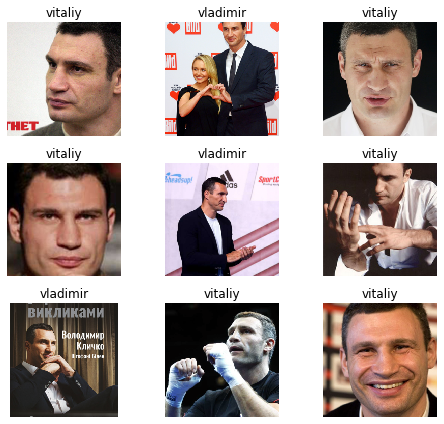

In [22]:
path = '/home/viktor/dev/ml/fastai-homework/data/vitaliy-vs-vladimir'
data = ImageDataBunch.from_folder(path, size=224, test='test')
data.normalize(imagenet_stats)
data.show_batch(rows=3, figsize=(7,6))

In [6]:
# Prepare model
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [14]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.849375,0.424830,0.197133,00:13
1,0.636087,0.404471,0.161290,00:10
2,0.493064,0.324123,0.121864,00:10
3,0.392374,0.320628,0.114695,00:09


In [15]:
learn.save('stage-1')

## Results

In [16]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

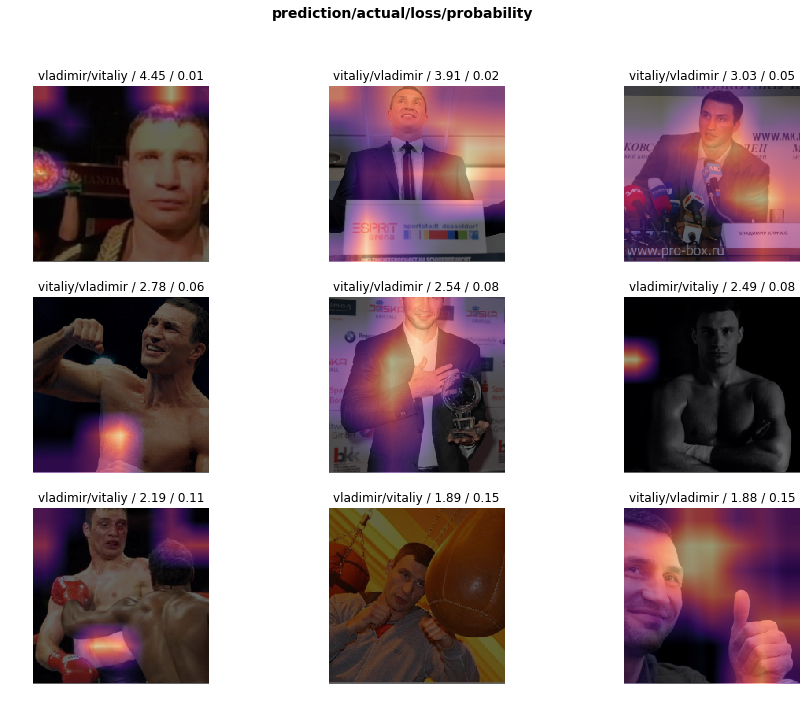

In [17]:
interp.plot_top_losses(9, figsize=(15,11))

In [18]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


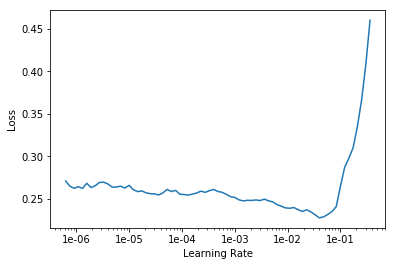

In [19]:
learn.recorder.plot()

In [20]:
learn.unfreeze()
learn.fit_one_cycle(4, max_lr=slice(1e-4,1e-2))

epoch,train_loss,valid_loss,error_rate,time
0,0.413947,0.482067,0.157706,00:11
1,0.332195,0.523144,0.132616,00:11
2,0.214957,0.147849,0.053763,00:11
3,0.146237,0.099928,0.043011,00:10


In [21]:
learn.save('stage-2')

## Predicting

In [7]:
learn.load('stage-2')
learn.predict(data.train_ds[0][0])

(Category vladimir, tensor(1), tensor([0.1401, 0.8599]))

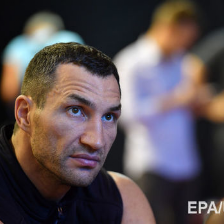

In [8]:
data.train_ds[0][0]

## Testing

(Category vladimir, tensor(1), tensor([0.3871, 0.6129]))


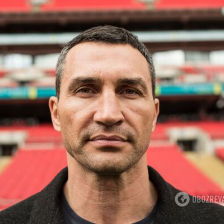

In [41]:
learn.load('stage-2')

pred = learn.predict(data.test_ds[0][0])
print(pred)
data.test_ds[0][0]

(Category vitaliy, tensor(0), tensor([9.9998e-01, 2.1475e-05]))


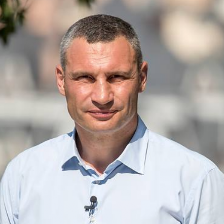

In [42]:
pred = learn.predict(data.test_ds[1][0])
print(pred)
data.test_ds[1][0]

(Category vitaliy, tensor(0), tensor([9.9948e-01, 5.2500e-04]))


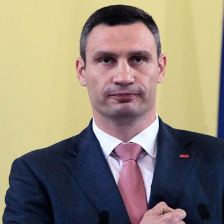

In [43]:
pred = learn.predict(data.test_ds[2][0])
print(pred)
data.test_ds[2][0]

(Category vladimir, tensor(1), tensor([0.0487, 0.9513]))


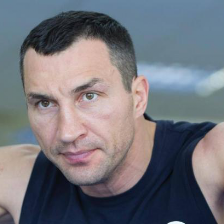

In [44]:
pred = learn.predict(data.test_ds[3][0])
print(pred)
data.test_ds[3][0]

(Category vladimir, tensor(1), tensor([0.0144, 0.9856]))


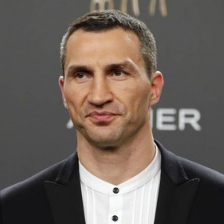

In [45]:
pred = learn.predict(data.test_ds[4][0])
print(pred)
data.test_ds[4][0]

(Category vitaliy, tensor(0), tensor([0.8149, 0.1851]))


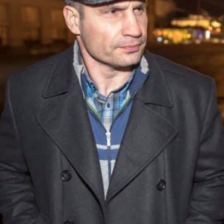

In [46]:
pred = learn.predict(data.test_ds[5][0])
print(pred)
data.test_ds[5][0]

## Prod

In [58]:
from fastai import *
from fastai.vision import *

In [59]:
path = Path('/home/viktor/dev/ml/data/vitaliy-vs-vladimir')

In [74]:
learn = load_learner(path, file='export.pkl')

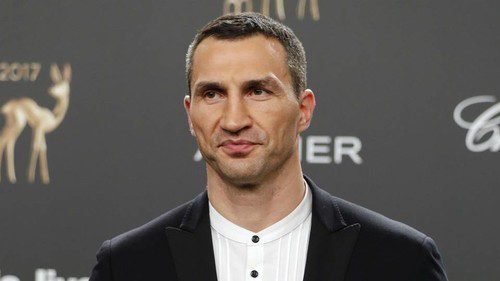

In [75]:
img = open_image(path/'test'/'4.jpg')
img

In [76]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category vladimir

In [106]:
int(to_np(outputs)[try_int(pred_idx)] * 100)
#to_float(outputs[try_int(pred_idx)])


99